<a href="https://colab.research.google.com/github/Devapriyas/OIBSIP/blob/main/task_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SALES PREDICTION

In [32]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [33]:
df = pd.read_csv("/content/advertising.csv.zip")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [34]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [35]:
df = df.drop(df.columns[0], axis=1)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [36]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [38]:
df.shape

(200, 4)

In [39]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

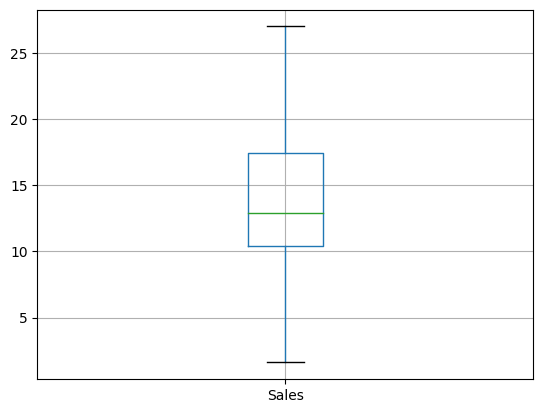

In [40]:
#checking outliers using boxplot
df.boxplot(column=['Sales']);
plt.show()

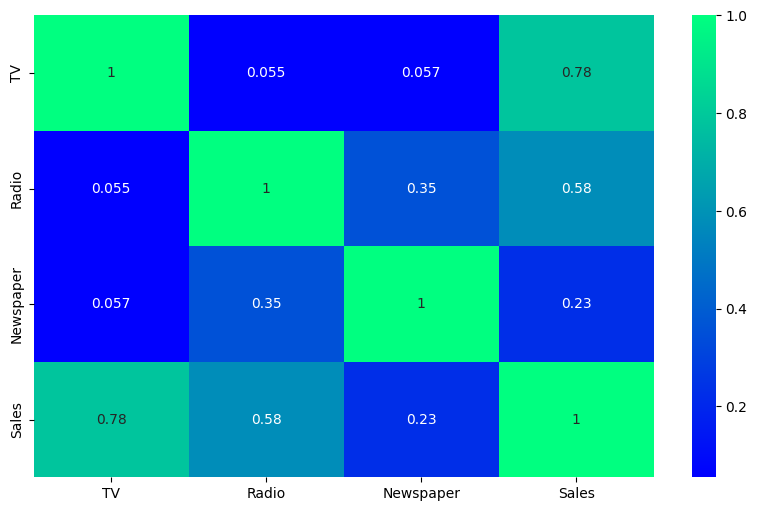

In [41]:
#calculating the correlation
correlation = df.corr()

#plotting correlation as a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap="winter")
plt.show()

In [42]:
#select the target variable and set the correlation threshold
target = 'Sales'
threshold = 0.2

#filter the features based on correlation
features = correlation[abs(correlation[target]) > threshold][target]

print(features)

TV           0.782224
Radio        0.576223
Newspaper    0.228299
Sales        1.000000
Name: Sales, dtype: float64


In [43]:
#separate the features and target variables
x = df.drop('Sales', axis=1) # feature(except Sales)
y=df['Sales'] # target columns(Sales)

In [44]:
#split the dataset into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [45]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [46]:
# LinearRegression model
model = LinearRegression()

#fit the model
model.fit(x_train, y_train)

LinearRegression()

In [47]:
#predicting on test set
y_pred = model.predict(x_test)

In [48]:
#calculating mean squared error, root mean squared, mean absolute error, r-squared score
mse = mean_squared_error(y_test, y_pred)
print("mean squared error:", mse)

rmse =  mean_squared_error(y_test, y_pred, squared=False)
print("root mean squared error:", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("mean absolute error:", mae)

r2 = r2_score(y_test, y_pred)
print("r2_score", r2)

mean squared error: 3.1740973539761033
root mean squared error: 1.78159966153345
mean absolute error: 1.4607567168117603
r2_score 0.899438024100912


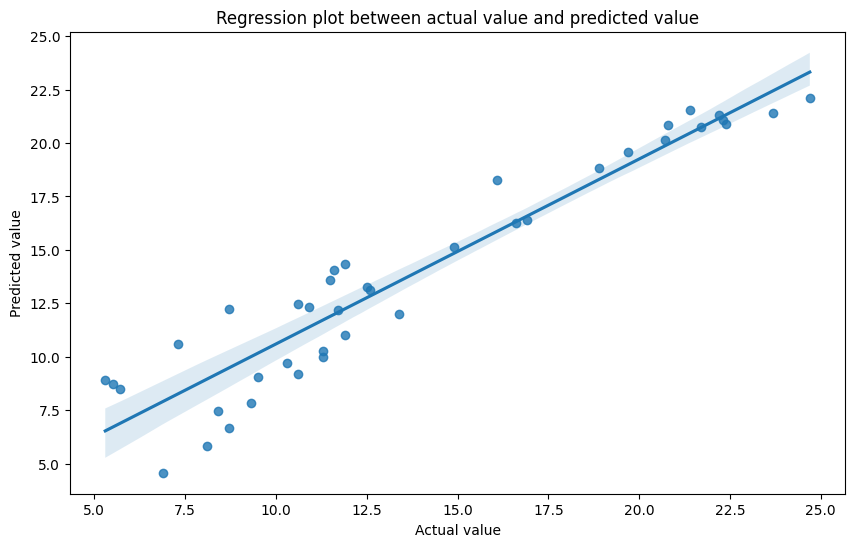

In [49]:
#analyze the data by regression plot
plt.figure(figsize=(10,6))
sns.regplot(df, x=y_test, y=y_pred)
plt.title("Regression plot between actual value and predicted value")
plt.xlabel("Actual value")
plt.ylabel("Predicted value");
plt.show()

In [50]:
#predicting with new values

new_df = pd.DataFrame([[100,90,32]], columns=['TV', 'Radio', 'Newspaper'])

new_df_prediction = model.predict(new_df)

print("Predicted Sales:", new_df_prediction)

Predicted Sales: [24.56792963]
